In [1]:
day14 = open('inputs/day14.txt').read()
day14 = day14.split('\n')

In [2]:
import numpy as np

cave = np.full((200,1000), [0],dtype=int)

In [3]:
y = []
for line in day14:
    positions = [pos.strip() for pos in line.split('->')]
    for i in range(len(positions)-1):
        x1, y1 = positions[i].split(',')
        x2, y2 = positions[i+1].split(',')
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        y.append(y1)
        y.append(y2)

        if x1 == x2:
#           draw vertical line at {x1} from {y1} to {y2}
            for i in range(np.abs(y2-y1)+1):
                if y2 - y1 < 0:
                    i = -i
                cave[y1+i,x1] = 1
        
        else:
#           draw horizonal line at {y1} from {x1} to {x2}"
            for i in range(np.abs(x2-x1)+1):
                if x2 - x1 < 0:
                    i = -i
                cave[y1,x1+i] = 1
                
max_y = (max(y))
cave[max_y+2] = 1

FileNotFoundError: [Errno 2] No such file or directory: 'images/1.png'

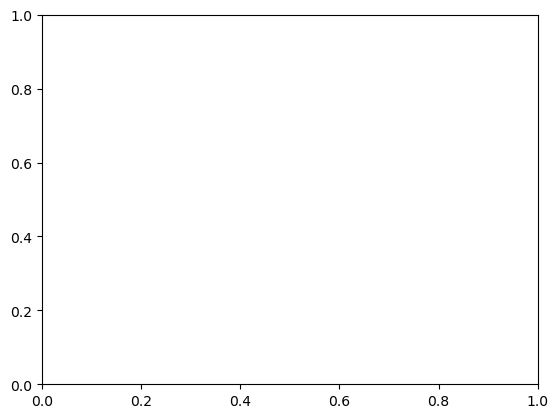

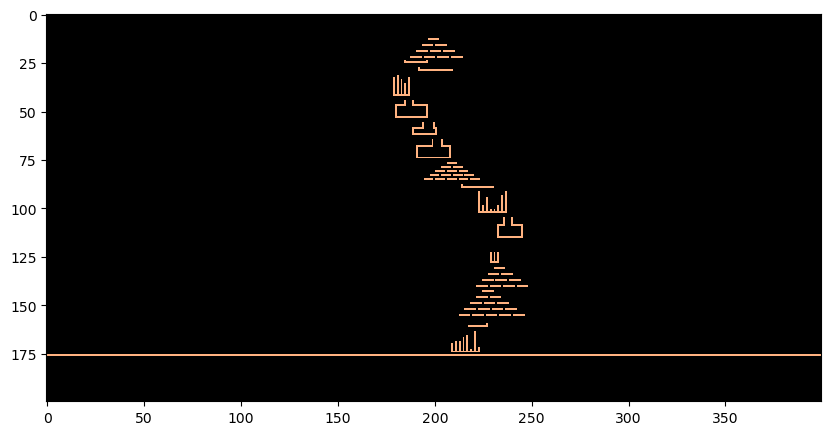

In [4]:
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

plt.register_cmap(cmap=LinearSegmentedColormap.from_list(name='sand',colors=[[0.0,0.0,0.0,1.0],[1.0,0.0,0.0,1.0],[194.0,178.0,128.0,1.0]]))

def save_graph(unit, data):
    fig, ax = plt.subplots()
    plt.figure(figsize = (10,6))
    plt.imshow([x[300:700] for x in cave], interpolation='nearest',cmap="sand",vmin=0,vmax=2)
    plt.savefig(f'images/{unit}.png')
    plt.clf()
    plt.close('all')
save_graph(1, cave)

In [5]:
units = 0
floor = False

while floor == False:
    units += 1
    sand_x, sand_y = 0,500
#     save_graph(units, cave)
    while ((cave[sand_x+1, sand_y] == 0) | (cave[sand_x+1, sand_y-1] == 0) | (cave[sand_x+1, sand_y+1] == 0)) & (sand_x < max_y+2):
        if sand_x == max_y: 
            floor = True
        
        if cave[sand_x+1, sand_y] == 0:
            sand_x, sand_y = sand_x+1, sand_y
#           moving down
        elif cave[sand_x+1, sand_y-1] == 0:
            sand_x, sand_y = sand_x+1, sand_y-1
#           moving left
        elif cave[sand_x+1, sand_y+1] == 0:
            sand_x, sand_y = sand_x +1, sand_y+1
#           moving right
    cave[sand_x, sand_y] = 2

print(f"Part 1 answer: {units-1}")

Part 1 answer: 979


In [6]:
top = False

while top == False:
#     save_graph(units, cave)
    units += 1
    sand_x, sand_y = 0,500
    while ((cave[sand_x+1, sand_y] == 0) | (cave[sand_x+1, sand_y-1] == 0) | (cave[sand_x+1, sand_y+1] == 0)) & (sand_x < max_y+2):
        if cave[sand_x+1, sand_y] == 0:
            sand_x, sand_y = sand_x+1, sand_y
#           moving down
        elif cave[sand_x+1, sand_y-1] == 0:
            sand_x, sand_y = sand_x+1, sand_y-1
#           moving left
        elif cave[sand_x+1, sand_y+1] == 0:
            sand_x, sand_y = sand_x +1, sand_y+1
#           moving right
    cave[sand_x, sand_y] = 2
    if cave[0,500] == 2:
        top = True

print(f"Part 2 answer: {units}")

Part 2 answer: 29044


In [1]:
from tqdm import tqdm
import imageio
images = []
for i in tqdm(range(29043)):
    filename = f'images/{i+1}.png'
    images.append(imageio.imread(filename))
imageio.mimsave('movie.gif', images)

  0%|                                                 | 0/29043 [00:00<?, ?it/s]/var/folders/3s/fznvyvxx6gz2jbsddrqqlsdw0000gp/T/ipykernel_92289/588958445.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
100%|████████████████████████████████████| 29043/29043 [03:23<00:00, 142.49it/s]
